In [1]:
# import libraries


import numpy as np
import pandas as pd
# Import modules
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df  = pd.read_csv("Dataset.csv")
df.head()

Unnamed: 0   x_1  x_109  x_113  x_12  x_124  x_127  x_144  x_16  x_18  ...  \
0           0  5099      1      5   156     35     -2      1    40   999  ...   
1           1  5191      0      1   164     16      1      5     4   999  ...   
2           2  5228      1      0   774     75      1      5    12   999  ...   
3           3  5228      1      1   747      4      1      5    69   999  ...   
4           4  5196      1      5    29     28      0      4    32   999  ...   

   x_73  x_77  x_78  x_8  x_80  x_83  x_89  x_91  x_99  y  
0  0.11   629    14  487 -0.31   115  0.02 -0.10 -0.49  0  
1  0.11   509    26  346 -0.31   317  0.02  0.24 -0.21  0  
2  0.11  1058    30  227 -0.31   464  0.02 -0.10 -0.21  0  
3  0.11  1048     4   17 -0.31    39 -0.18 -0.10 -0.21  0  
4  0.11   993    22   58 -0.31   492  0.02 -0.10  0.21  0  

[5 rows x 42 columns]

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

x_1  x_109  x_113  x_12  x_124  x_127  x_144  x_16  x_18  x_2  ...  x_73  \
0  5099      1      5   156     35     -2      1    40   999    7  ...  0.11   
1  5191      0      1   164     16      1      5     4   999    5  ...  0.11   
2  5228      1      0   774     75      1      5    12   999    4  ...  0.11   
3  5228      1      1   747      4      1      5    69   999    3  ...  0.11   
4  5196      1      5    29     28      0      4    32   999    6  ...  0.11   

   x_77  x_78  x_8  x_80  x_83  x_89  x_91  x_99  y  
0   629    14  487 -0.31   115  0.02 -0.10 -0.49  0  
1   509    26  346 -0.31   317  0.02  0.24 -0.21  0  
2  1058    30  227 -0.31   464  0.02 -0.10 -0.21  0  
3  1048     4   17 -0.31    39 -0.18 -0.10 -0.21  0  
4   993    22   58 -0.31   492  0.02 -0.10  0.21  0  

[5 rows x 41 columns]

In [4]:
# X and y
X = df.drop('y', axis=1) # features / input
y = df['y'].values  # target

In [5]:
X.head()

x_1  x_109  x_113  x_12  x_124  x_127  x_144  x_16  x_18  x_2  ...  x_71  \
0  5099      1      5   156     35     -2      1    40   999    7  ...     1   
1  5191      0      1   164     16      1      5     4   999    5  ...     0   
2  5228      1      0   774     75      1      5    12   999    4  ...     0   
3  5228      1      1   747      4      1      5    69   999    3  ...     1   
4  5196      1      5    29     28      0      4    32   999    6  ...     0   

   x_73  x_77  x_78  x_8  x_80  x_83  x_89  x_91  x_99  
0  0.11   629    14  487 -0.31   115  0.02 -0.10 -0.49  
1  0.11   509    26  346 -0.31   317  0.02  0.24 -0.21  
2  0.11  1058    30  227 -0.31   464  0.02 -0.10 -0.21  
3  0.11  1048     4   17 -0.31    39 -0.18 -0.10 -0.21  
4  0.11   993    22   58 -0.31   492  0.02 -0.10  0.21  

[5 rows x 40 columns]

# Removing Duplicate Columns

In [6]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [7]:
duplicate_columns = get_duplicate_columns(X)
duplicate_columns

{}

*there are no duplicate columns*

# univariate analysis

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#### kde plots

c:\Users\Admin\miniconda3\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


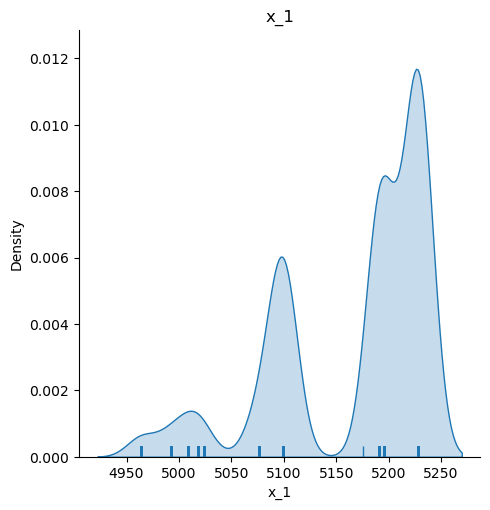

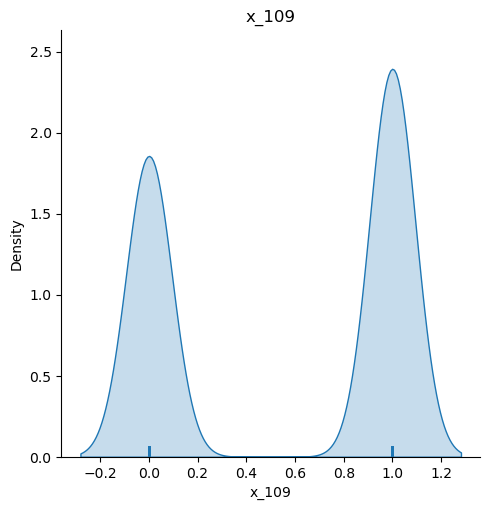

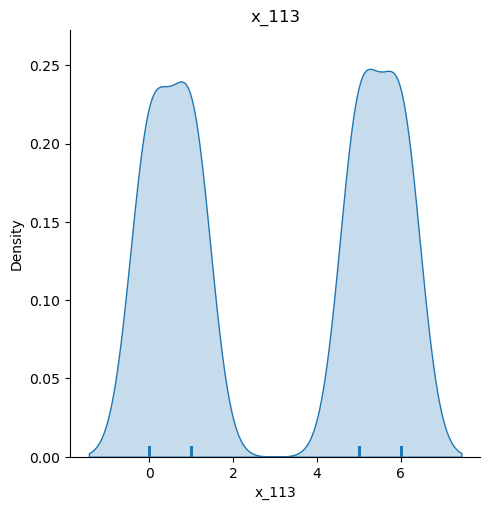

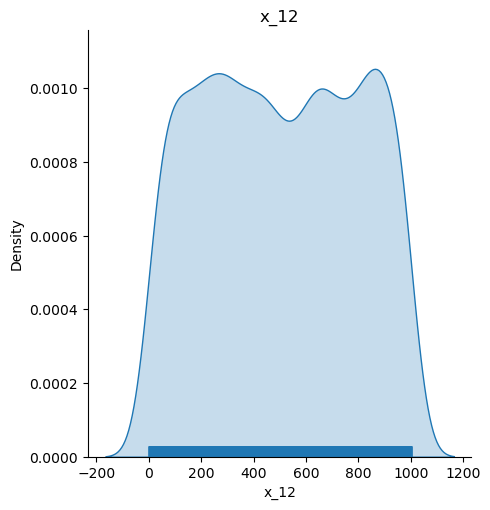

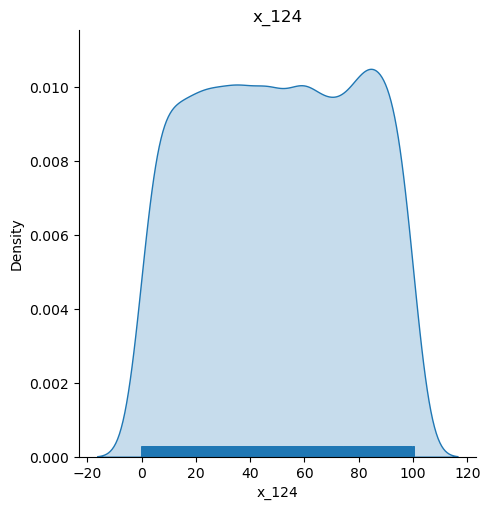

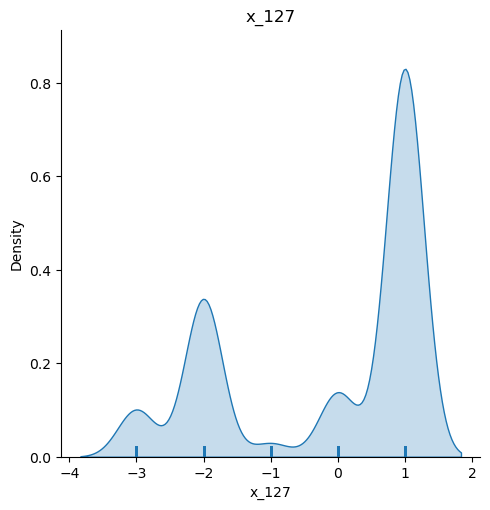

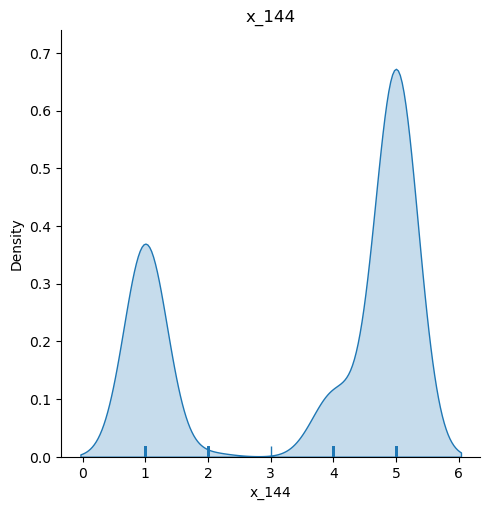

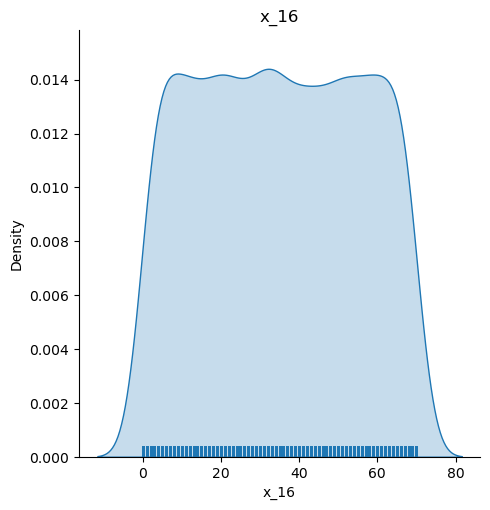

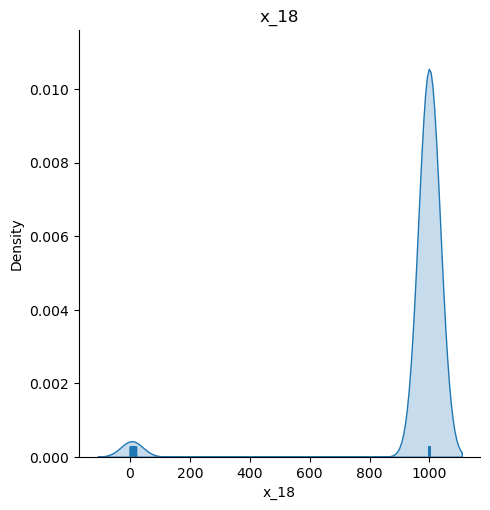

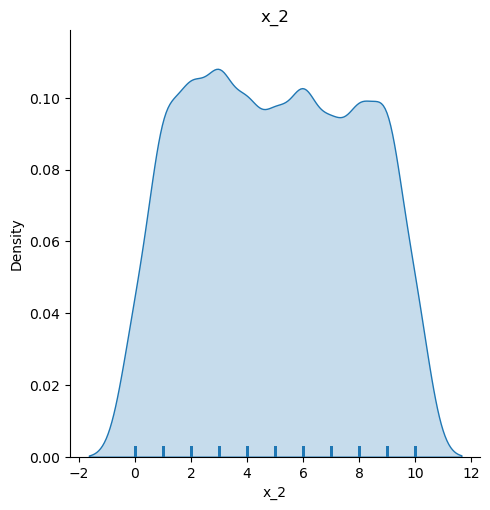

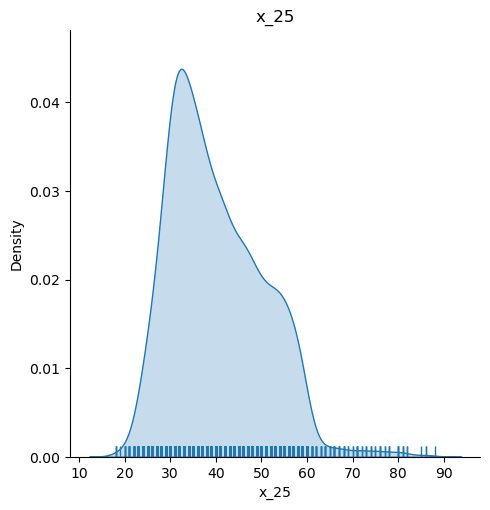

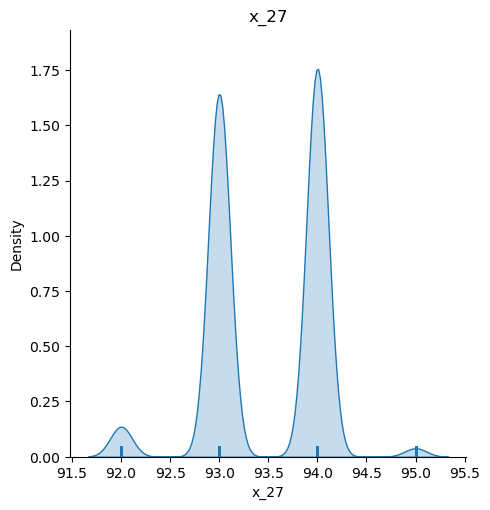

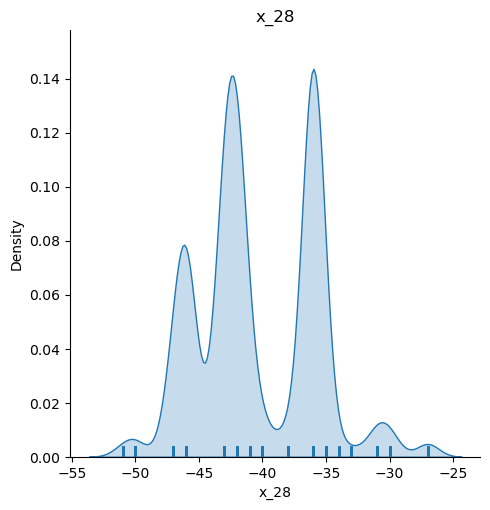

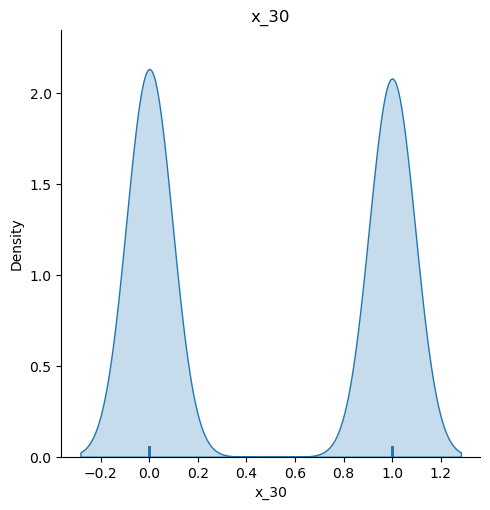

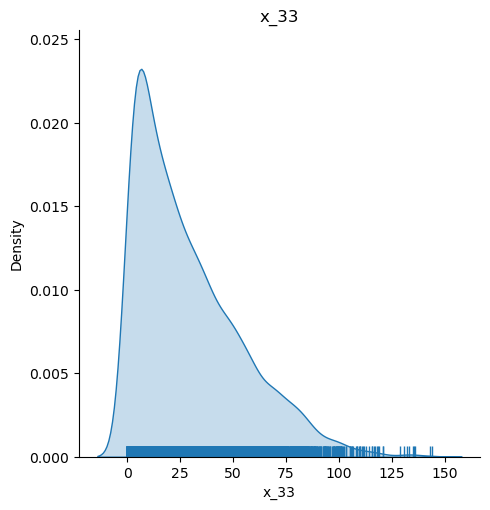

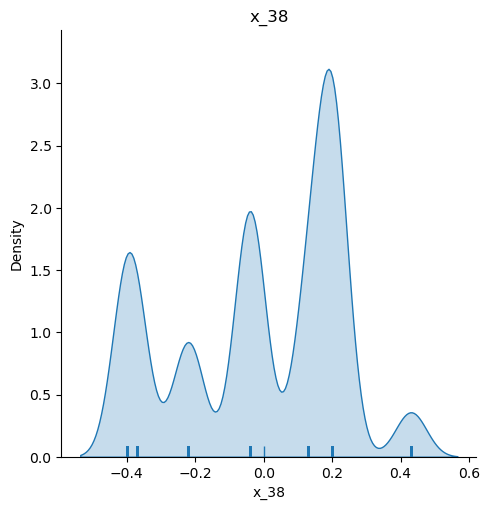

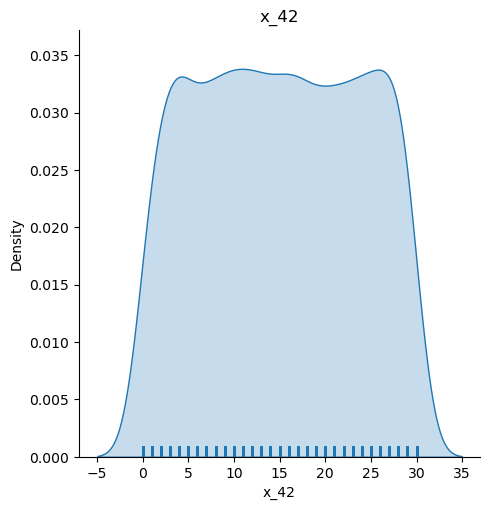

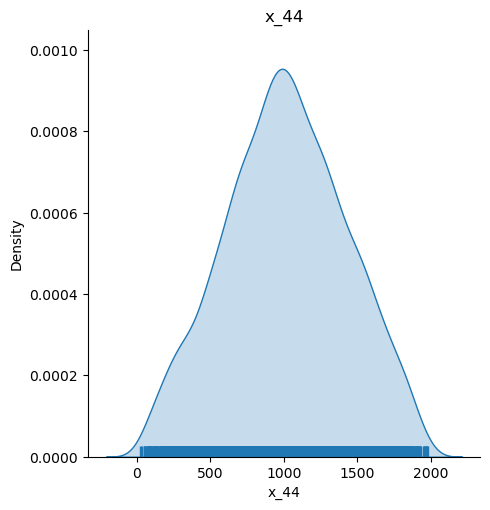

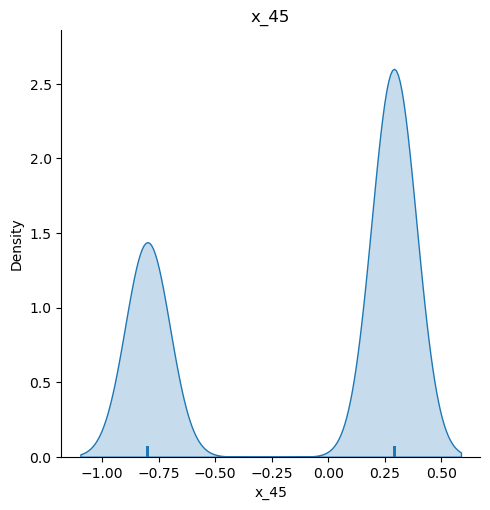

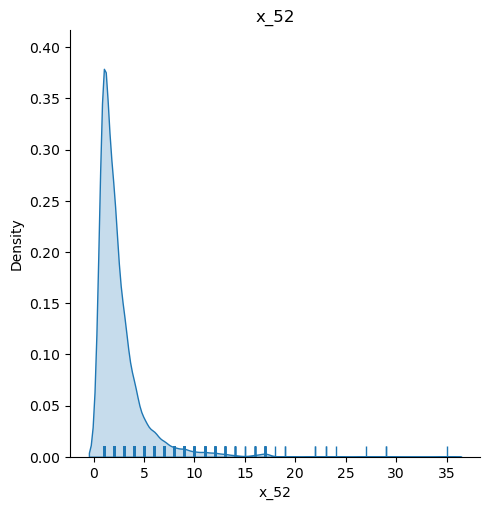

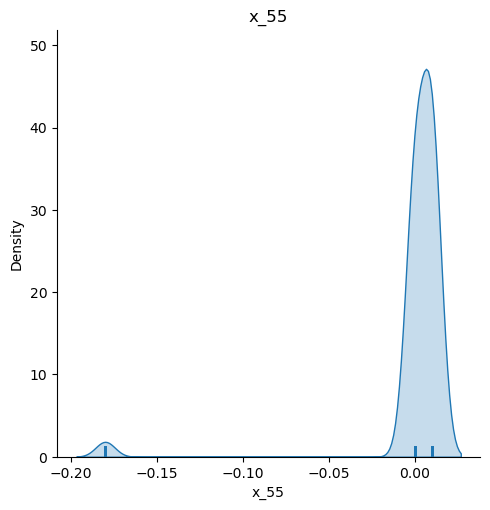

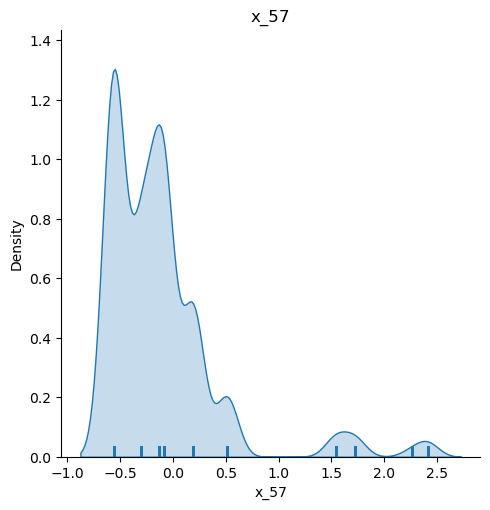

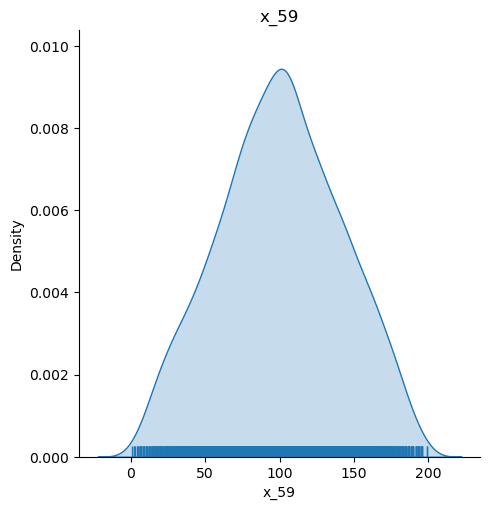

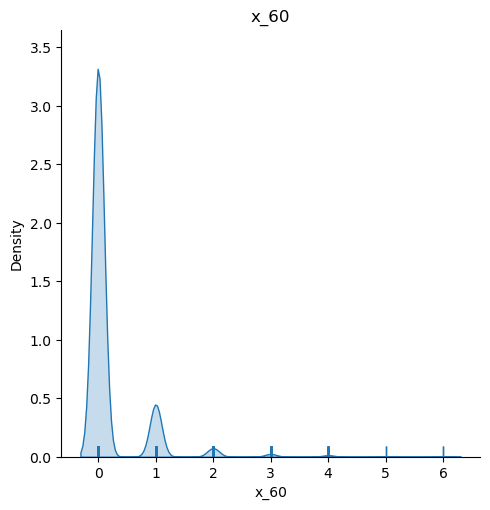

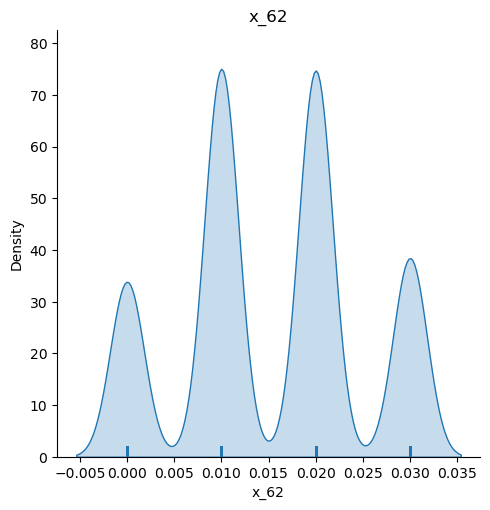

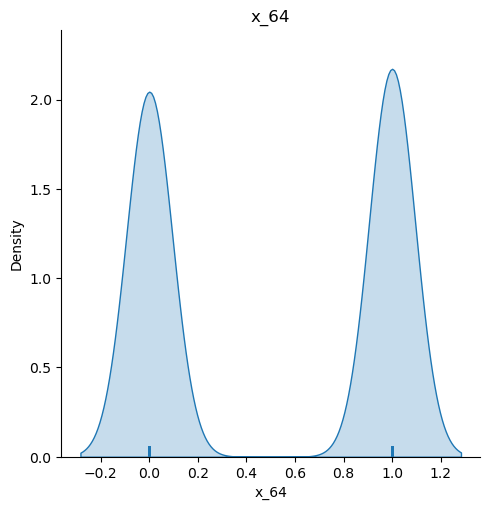

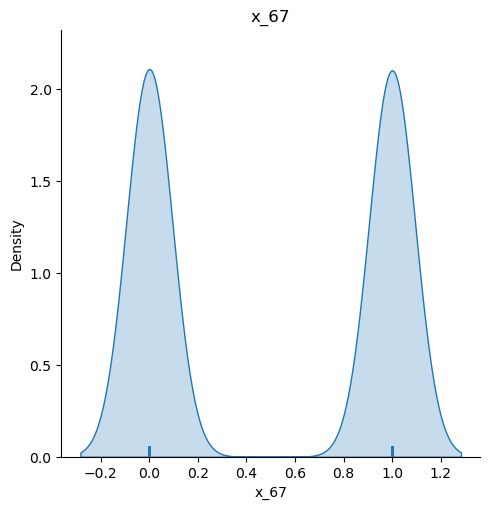

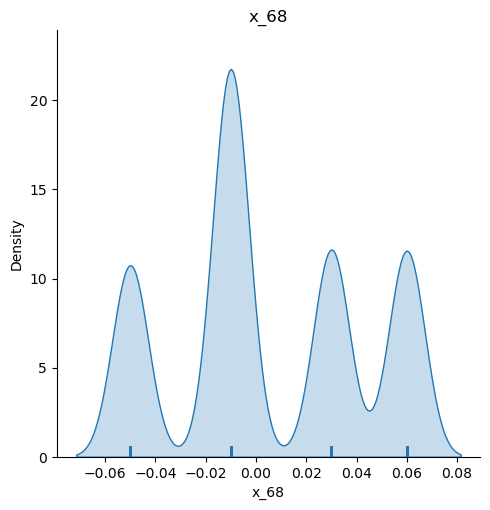

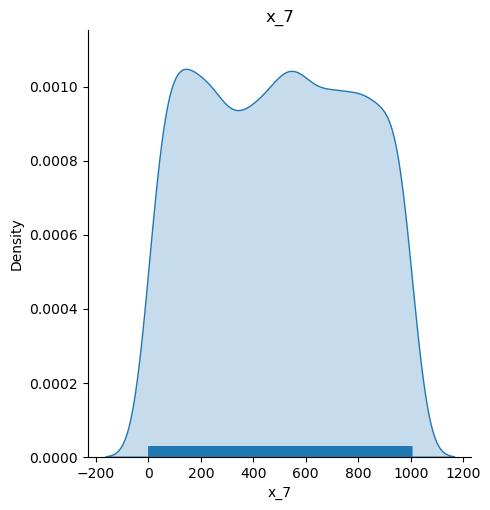

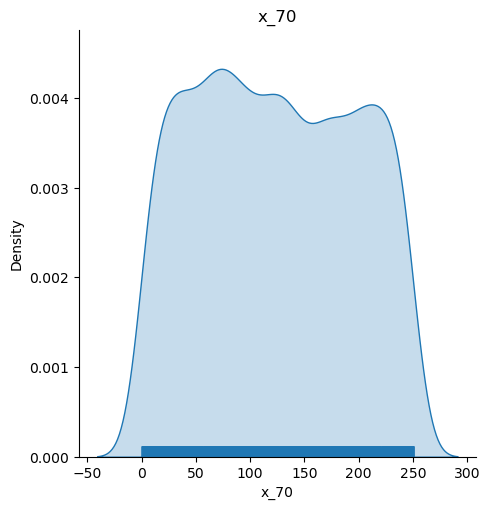

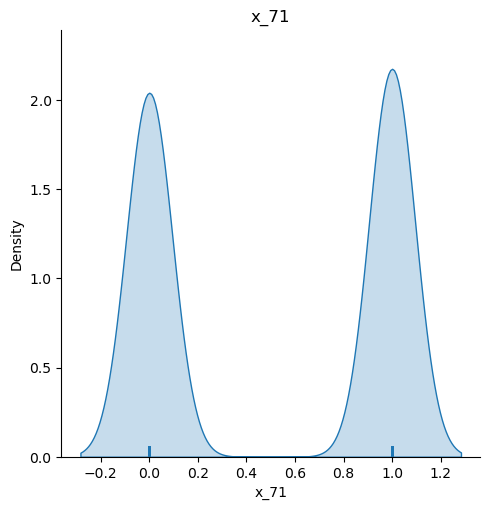

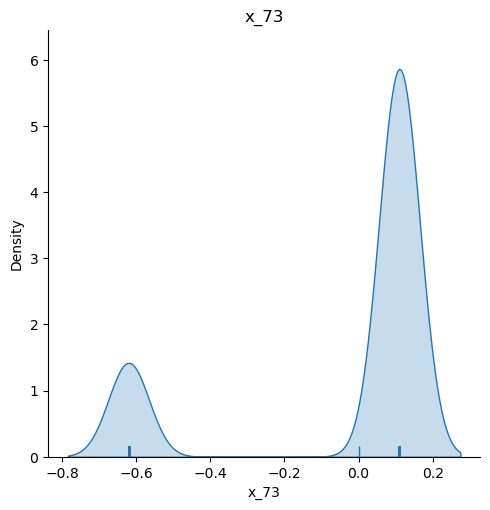

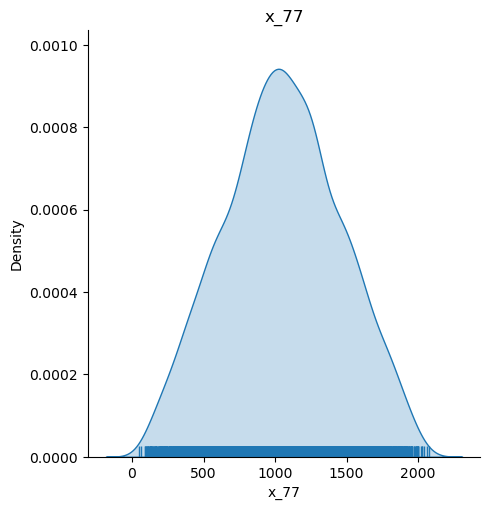

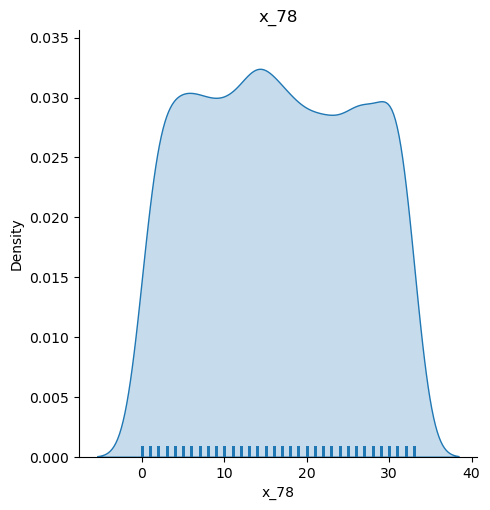

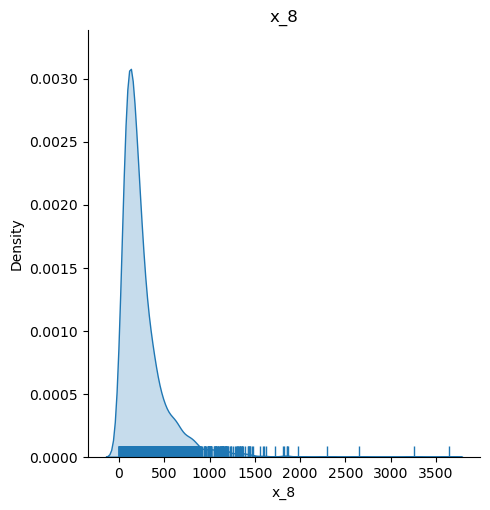

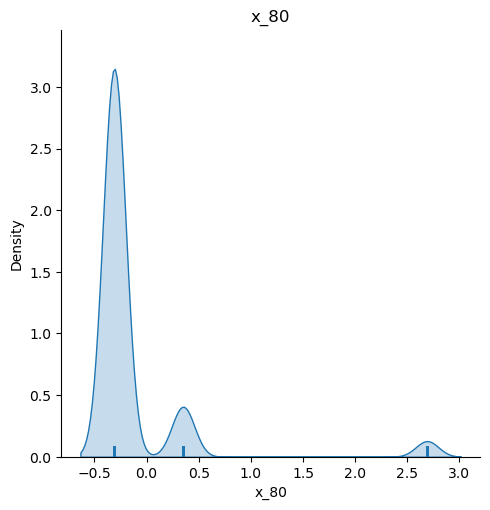

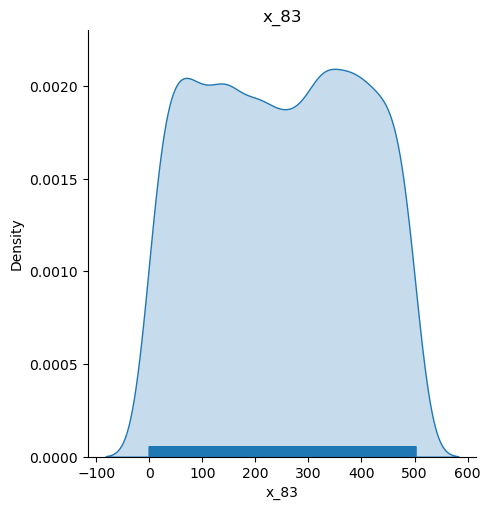

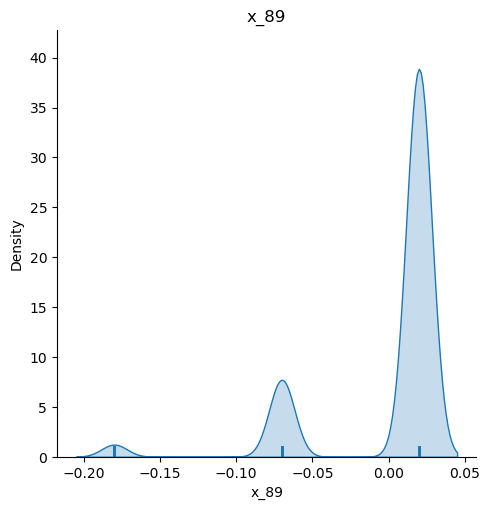

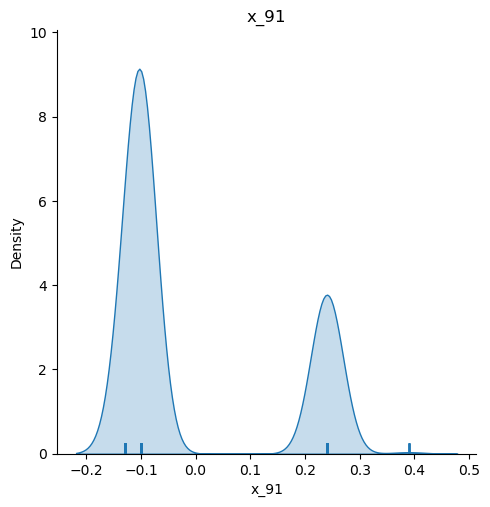

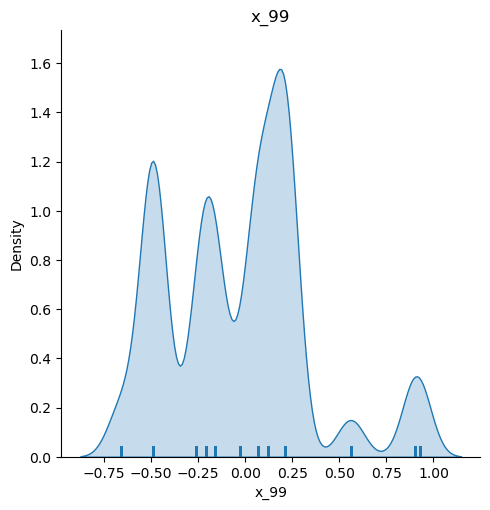

In [9]:
# kde plot
columns = X.columns
for col in columns:

    sns.displot(data=X, x=col, kind= 'kde', fill =True, rug=True).set(title= col)

from the above plots it is clear that some of the features are catoegorical. we need to find features which are categorical and which are not categorical.



### find categorical features

In [10]:
for col in columns:
    print(f"col: {col} , value_counts: {X[col].value_counts()}")
    print("***************")

col: x_1 , value_counts: x_1
5228    1626
5099     823
5191     758
5196     392
5076     164
5018     104
4992      87
4964      83
5009      60
5024      21
5176       1
Name: count, dtype: int64
***************
col: x_109 , value_counts: x_109
1    2320
0    1799
Name: count, dtype: int64
***************
col: x_113 , value_counts: x_113
5    1055
6    1043
1    1025
0     996
Name: count, dtype: int64
***************
col: x_12 , value_counts: x_12
356    13
854    12
860    12
284    11
420    10
       ..
352     1
484     1
611     1
346     1
564     1
Name: count, Length: 990, dtype: int64
***************
col: x_124 , value_counts: x_124
37     55
45     55
60     52
99     51
3      50
       ..
17     32
7      31
74     28
100    19
0      16
Name: count, Length: 101, dtype: int64
***************
col: x_127 , value_counts: x_127
 1    2384
-2     970
 0     393
-3     289
-1      83
Name: count, dtype: int64
***************
col: x_144 , value_counts: x_144
5    2392
1    1317

given no description about the dataset and feature types we can only assume that features which are having 0 and 1 are categorical and others non-categorical. some features has discrete values but we cannot interpret them as categorical or otherwise since we don't have feature description.

categorical features: x_71, x_67, x_64, x_30, x_109

In [11]:
cat_features = ['x_71', 'x_67', 'x_64', 'x_30', 'x_109']
non_cat_features = [col for col in columns if col not in cat_features]

# variance threshold method

In [24]:
# split into train test and normalise the features
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 48 , stratify=y)


# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

from sklearn.preprocessing import MinMaxScaler
MinMax_scaler = MinMaxScaler()
MinMax_scaler.fit(X_train)

MinMaxScaler()

In [25]:
X_train_scaled = MinMax_scaler.transform(X_train)
X_test_scaled = MinMax_scaler.transform(X_test)

In [27]:
## convert to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [28]:
X_train_scaled.head()

x_1  x_109     x_113      x_12  x_124  x_127  x_144      x_16  \
0  0.511364    1.0  0.833333  0.570571   0.64   0.25   0.00  0.071429   
1  0.106061    0.0  1.000000  0.655656   0.23   0.25   0.00  0.942857   
2  0.878788    0.0  0.833333  0.079079   0.48   0.75   0.75  0.514286   
3  0.878788    1.0  1.000000  0.903904   0.31   0.75   0.75  0.957143   
4  1.000000    0.0  0.166667  0.002002   0.63   1.00   1.00  0.828571   

       x_18  x_2  ...  x_71  x_73      x_77      x_78       x_8  x_80   x_83  \
0  1.000000  0.0  ...   0.0   1.0  0.537968  0.272727  0.006148   0.0  0.512   
1  0.003003  0.8  ...   0.0   1.0  0.792899  0.606061  0.044574   1.0  0.912   
2  1.000000  0.3  ...   1.0   1.0  0.698225  0.606061  0.311712   0.0  0.656   
3  1.000000  0.6  ...   1.0   1.0  0.446252  0.848485  0.081463   0.0  0.854   
4  1.000000  1.0  ...   0.0   1.0  0.495069  0.272727  0.032585   0.0  0.676   

   x_89      x_91      x_99  
0  1.00  0.711538  0.459119  
1  1.00  0.057692  0.314465  
2  1.00  0.057692  0.547170  
3  1.00  0.057692  0.314465  
4  0.55  0.000000  0.547170  

[5 rows x 40 columns]

In [87]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)

In [88]:
sel.fit(X_train_scaled)

VarianceThreshold(threshold=0.05)

In [89]:
sum(sel.get_support())

25

In [90]:
print('number of columns which are static or quasi static (below variance threshold) = ', X_train.shape[1] - sum(sel.get_support()))

number of columns which are static or quasi static (below variance threshold) =  15


*so there are 15 features whose variance is less than 0.05. it means they are either static or quasi-static* 

In [93]:
VT_columns = X_train_scaled.columns[sel.get_support()]
print('columns which has variance more than 0.05')
VT_columns

columns which has variance more than 0.05


Index(['x_1', 'x_109', 'x_113', 'x_12', 'x_124', 'x_127', 'x_144', 'x_16',
       'x_2', 'x_30', 'x_38', 'x_42', 'x_45', 'x_62', 'x_64', 'x_67', 'x_68',
       'x_7', 'x_70', 'x_71', 'x_73', 'x_78', 'x_83', 'x_91', 'x_99'],
      dtype='object')

In [94]:
len(VT_columns)

25

In [98]:
## create a dataframe where only above selected columns are present.

X_train_VT = sel.transform(X_train_scaled)
X_test_VT = sel.transform(X_test_scaled)

X_train_VT = pd.DataFrame(X_train_VT, columns=VT_columns)
X_test_VT = pd.DataFrame(X_test_VT, columns=VT_columns)

X_train_VT.head()

x_1  x_109     x_113      x_12  x_124  x_127  x_144      x_16  x_2  \
0  0.511364    1.0  0.833333  0.570571   0.64   0.25   0.00  0.071429  0.0   
1  0.106061    0.0  1.000000  0.655656   0.23   0.25   0.00  0.942857  0.8   
2  0.878788    0.0  0.833333  0.079079   0.48   0.75   0.75  0.514286  0.3   
3  0.878788    1.0  1.000000  0.903904   0.31   0.75   0.75  0.957143  0.6   
4  1.000000    0.0  0.166667  0.002002   0.63   1.00   1.00  0.828571  1.0   

   x_30  ...  x_67      x_68       x_7   x_70  x_71  x_73      x_78   x_83  \
0   0.0  ...   0.0  0.727273  0.803804  0.024   0.0   1.0  0.272727  0.512   
1   1.0  ...   1.0  1.000000  0.314314  0.232   0.0   1.0  0.606061  0.912   
2   0.0  ...   1.0  0.363636  0.173173  0.772   1.0   1.0  0.606061  0.656   
3   1.0  ...   0.0  0.000000  0.857858  0.956   1.0   1.0  0.848485  0.854   
4   0.0  ...   1.0  0.727273  0.443443  0.000   0.0   1.0  0.272727  0.676   

       x_91      x_99  
0  0.711538  0.459119  
1  0.057692  0.314465  
2  0.057692  0.547170  
3  0.057692  0.314465  
4  0.000000  0.547170  

[5 rows x 25 columns]

### correlation

<Axes: >

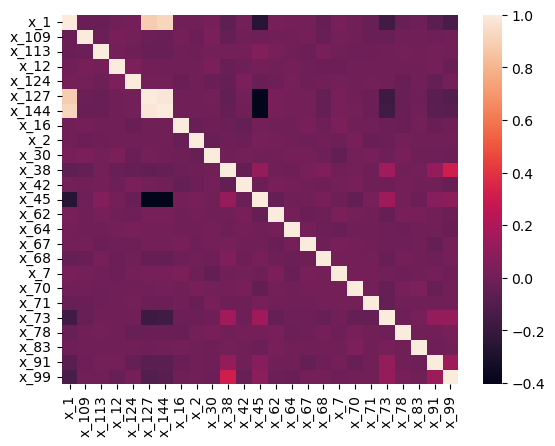

In [101]:
sns.heatmap(X_train_VT.corr())

In [102]:
corr_matrix = X_train_VT.corr()

In [104]:
corr_matrix.shape

(25, 25)

In [107]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []
columns_to_drop2 = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])
            columns_to_drop2.append(columns[i])

print(len(columns_to_drop))

1


In [109]:
columns_to_drop, columns_to_drop2

(['x_144'], ['x_127'])

In [110]:
corr_matrix.loc[columns_to_drop[0], columns_to_drop2[0]]

0.9788529062568109

**(['x_144'], ['x_127']) are highly correlated:**
remove any one of them.

In [115]:
# find which column has least correlation with target variable y

corr_x_144 = np.corrcoef(X_train_VT['x_144'].values,y_train )
corr_x_127 = np.corrcoef(X_train_VT['x_127'].values, y_train)

print(f"x_144 --> {corr_x_144[0,1]}, x_127 --> {corr_x_127[0,1]}")

x_144 --> -0.28327504839477485, x_127 --> -0.29204776662101534


x_127 is more correlated with target variable. We can also check VIR of both the columns before deciding which one to eliminate.

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [119]:
VT_columns

Index(['x_1', 'x_109', 'x_113', 'x_12', 'x_124', 'x_127', 'x_144', 'x_16',
       'x_2', 'x_30', 'x_38', 'x_42', 'x_45', 'x_62', 'x_64', 'x_67', 'x_68',
       'x_7', 'x_70', 'x_71', 'x_73', 'x_78', 'x_83', 'x_91', 'x_99'],
      dtype='object')

In [121]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["cols: no x_127"] = [item for item in VT_columns if item != "x_127"]

# calculating VIF for each feature 
vif_data["VIF: no x_127"] = [variance_inflation_factor(X_train_VT.drop('x_127', axis=1).values, i) 
						for i in range(len(VT_columns)-1)] 

vif_data["cols: no x_144"] = [item for item in VT_columns if item != "x_144"]

# calculating VIF for each feature 
vif_data["VIF: no x_144"] = [variance_inflation_factor(X_train_VT.drop('x_144', axis=1).values, i) 
						for i in range(len(VT_columns) -1)] 

print(vif_data)


   cols: no x_127  VIF: no x_127 cols: no x_144  VIF: no x_144
0             x_1      51.254012            x_1      41.453629
1           x_109       2.239928          x_109       2.232836
2           x_113       2.376129          x_113       2.373391
3            x_12       3.850204           x_12       3.838611
4           x_124       3.895243          x_124       3.872434
5           x_144      22.854341          x_127      27.718907
6            x_16       3.709348           x_16       3.695747
7             x_2       3.760674            x_2       3.746068
8            x_30       1.963876           x_30       1.956159
9            x_38       4.200952           x_38       4.201911
10           x_42       3.816896           x_42       3.799097
11           x_45       3.932558           x_45       3.596438
12           x_62       3.513842           x_62       3.499777
13           x_64       2.045375           x_64       2.043559
14           x_67       1.969122           x_67       1

Above: we have calculated VIF for x_127 and x_144 by creating two separate dataframe such that excluding either one of them so that VIF of x_127 should not have effect of x_144 and vice-versa. it shows that VIF of x_144 and x_127 is far higher than  5. that implies these two features possess multicollinearity. so its better to drop both of them. 

In [122]:
X_train_1 = X_train_VT.drop(['x_144', 'x_127'], axis =1)
X_test_1 = X_test_VT.drop(['x_144', 'x_127'], axis=1)

columns_1 = X_train_1.columns
columns_1

Index(['x_1', 'x_109', 'x_113', 'x_12', 'x_124', 'x_16', 'x_2', 'x_30', 'x_38',
       'x_42', 'x_45', 'x_62', 'x_64', 'x_67', 'x_68', 'x_7', 'x_70', 'x_71',
       'x_73', 'x_78', 'x_83', 'x_91', 'x_99'],
      dtype='object')

In [123]:
len(columns_1)

23

### variance inflation factor

In [124]:
# VIF dataframe 
vif_data_1 = pd.DataFrame() 
vif_data_1["feature"] = columns_1

# calculating VIF for each feature 
vif_data_1["VIF"] = [variance_inflation_factor(X_train_1.values, i) 
						for i in range(len(columns_1))] 

print(vif_data_1)


   feature       VIF
0      x_1  7.345953
1    x_109  2.232554
2    x_113  2.373391
3     x_12  3.838513
4    x_124  3.871642
5     x_16  3.695684
6      x_2  3.746003
7     x_30  1.955267
8     x_38  4.195209
9     x_42  3.798789
10    x_45  2.981219
11    x_62  3.499622
12    x_64  2.043303
13    x_67  1.967384
14    x_68  3.026510
15     x_7  3.847109
16    x_70  3.704489
17    x_71  2.000571
18    x_73  4.972331
19    x_78  3.805794
20    x_83  3.725590
21    x_91  1.688207
22    x_99  4.051424


**VIF of x_1 is larger than 5. hence it possess multicollinearity. drop it**

In [125]:
X_train_2 = X_train_1.drop(['x_1'], axis =1)
X_test_2 = X_test_1.drop(['x_1'], axis=1)

columns_2 = X_train_2.columns
columns_2

Index(['x_109', 'x_113', 'x_12', 'x_124', 'x_16', 'x_2', 'x_30', 'x_38',
       'x_42', 'x_45', 'x_62', 'x_64', 'x_67', 'x_68', 'x_7', 'x_70', 'x_71',
       'x_73', 'x_78', 'x_83', 'x_91', 'x_99'],
      dtype='object')

In [126]:
len(columns_2)

22

# smote

SMOTE Oversampling the minority class for Training Set

In [130]:
X_2 = X[columns_2]
X_2

x_109  x_113  x_12  x_124  x_16  x_2  x_30  x_38  x_42  x_45  ...  x_67  \
0         1      5   156     35    40    7     1 -0.40    26  0.29  ...     1   
1         0      1   164     16     4    5     0 -0.04    24 -0.80  ...     1   
2         1      0   774     75    12    4     0 -0.04    12 -0.80  ...     1   
3         1      1   747      4    69    3     0 -0.40    22 -0.80  ...     0   
4         1      5    29     28    32    6     0  0.20     4  0.29  ...     1   
...     ...    ...   ...    ...   ...  ...   ...   ...   ...   ...  ...   ...   
4114      1      5   197     82     6    4     0 -0.37    29  0.29  ...     1   
4115      1      5   949     72     2    6     1 -0.04    22 -0.80  ...     0   
4116      1      1   478     41    25    1     1 -0.04     4  0.29  ...     1   
4117      1      0   554     36    68    0     0 -0.04    11  0.29  ...     1   
4118      1      0   143     26    21    1     1 -0.04     6  0.29  ...     0   

      x_68  x_7  x_70  x_71  x_73  x_78  x_83  x_91  x_99  
0    -0.01  220   237     1  0.11    14   115 -0.10 -0.49  
1    -0.01  871   220     0  0.11    26   317  0.24 -0.21  
2    -0.05  415   130     0  0.11    30   464 -0.10 -0.21  
3    -0.01  794   226     1  0.11     4    39 -0.10 -0.21  
4     0.06  308    49     0  0.11    22   492 -0.10  0.21  
...    ...  ...   ...   ...   ...   ...   ...   ...   ...  
4114  0.03  916    27     1  0.11    23   474 -0.10  0.21  
4115 -0.01  634    82     1  0.11     6   475 -0.10  0.21  
4116  0.06  636    34     0  0.11    16   210  0.24  0.93  
4117 -0.01  941    88     0  0.11    21    49 -0.10  0.21  
4118 -0.05  794   250     0  0.11    28   352  0.24 -0.16  

[4119 rows x 22 columns]

In [133]:
!pip install imblearn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   -------------------- ------------------- 122.9/235.6 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  235.5/235.6 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 1.8 MB/s eta 0:00:00


In [134]:
from imblearn.over_sampling import SMOTE
# Create train and test set
X_train, X_test, y_train, y_test = train_test_split(X_2,y, test_size = 0.2, random_state = 48 , stratify=y)

In [135]:
# scaling --> minmax scaling

MinMax_scaler = MinMaxScaler()
MinMax_scaler.fit(X_train)

MinMaxScaler()

In [137]:
X_train_scaled_1 = MinMax_scaler.transform(X_train)
X_test_scaled_1 = MinMax_scaler.transform(X_test)

# conver to dataframe

X_train_scaled_1_df = pd.DataFrame(X_train_scaled_1, columns = columns_2)
X_test_scaled_1_df = pd.DataFrame(X_test_scaled_1, columns = columns_2)

X_train_scaled_1_df.head()

x_109     x_113      x_12  x_124      x_16  x_2  x_30      x_38      x_42  \
0    1.0  0.833333  0.570571   0.64  0.071429  0.0   0.0  0.000000  0.833333   
1    0.0  1.000000  0.655656   0.23  0.942857  0.8   1.0  0.722892  0.700000   
2    0.0  0.833333  0.079079   0.48  0.514286  0.3   0.0  0.722892  0.466667   
3    1.0  1.000000  0.903904   0.31  0.957143  0.6   1.0  0.722892  0.466667   
4    0.0  0.166667  0.002002   0.63  0.828571  1.0   0.0  0.638554  0.233333   

   x_45  ...  x_67      x_68       x_7   x_70  x_71  x_73      x_78   x_83  \
0   1.0  ...   0.0  0.727273  0.803804  0.024   0.0   1.0  0.272727  0.512   
1   1.0  ...   1.0  1.000000  0.314314  0.232   0.0   1.0  0.606061  0.912   
2   1.0  ...   1.0  0.363636  0.173173  0.772   1.0   1.0  0.606061  0.656   
3   1.0  ...   0.0  0.000000  0.857858  0.956   1.0   1.0  0.848485  0.854   
4   0.0  ...   1.0  0.727273  0.443443  0.000   0.0   1.0  0.272727  0.676   

       x_91      x_99  
0  0.711538  0.459119  
1  0.057692  0.314465  
2  0.057692  0.547170  
3  0.057692  0.314465  
4  0.000000  0.547170  

[5 rows x 22 columns]

In [145]:
## checking dataset balance

_, count = np.unique(y_train, return_counts=True)
count

array([2934,  361], dtype=int64)

#### smote

In [141]:
## clearly there is class imbalance. Use SMOTE to balance the dataset
# Oversampling the training dataset only
oversample = SMOTE()
X_train_scaled_1_SMOTE, y_train_SMOTE = oversample.fit_resample(X_train_scaled_1_df, y_train)

In [146]:
_, count = np.unique(y_train_SMOTE, return_counts=True)
count

array([2934, 2934], dtype=int64)

now the classes are balanced

In [154]:
# fit the model to random forest and find the feature importances

# Specify possible hyperparameters 
parameters = {
    'criterion':['gini','entropy'],
    'max_depth':[10,11,12,13,14],
    "n_estimators": np.array([90, 120, 140, 160, 180, 200])
}
# Instantiate GridSearchCV object
cross_validation = StratifiedKFold(n_splits=5, random_state= 48, shuffle = True)
gs_cv = GridSearchCV(RandomForestClassifier(), parameters, scoring="roc_auc", cv=cross_validation,  verbose=3, n_jobs=-1)

# Fit to training set
gs_cv.fit(X_train_scaled_1_SMOTE, y_train_SMOTE)

print("Tuned Model Parameters: {}".format(gs_cv.best_params_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Tuned Model Parameters: {'criterion': 'gini', 'max_depth': 14, 'n_estimators': 180}


In [156]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=180, criterion= 'gini', max_depth=14)

# Fit the model to the training data
rf_classifier.fit(X_train_scaled_1_SMOTE,y_train_SMOTE)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_scaled_1_SMOTE.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [157]:

# Select the top 20 features
top_20_features = feature_importance_df.head(20)

# Display the top 20 features
print(top_20_features)

   Feature  Importance
21    x_99    0.107576
7     x_38    0.087943
9     x_45    0.086388
10    x_62    0.072277
13    x_68    0.064618
1    x_113    0.063406
20    x_91    0.051569
14     x_7    0.049626
18    x_78    0.044027
3    x_124    0.043522
19    x_83    0.043112
8     x_42    0.040790
5      x_2    0.040059
2     x_12    0.039097
15    x_70    0.036561
4     x_16    0.034005
17    x_73    0.033700
6     x_30    0.013644
11    x_64    0.013096
12    x_67    0.012838


In [170]:
columns_rf = top_20_features.Feature.values
columns_rf

array(['x_99', 'x_38', 'x_45', 'x_62', 'x_68', 'x_113', 'x_91', 'x_7',
       'x_78', 'x_124', 'x_83', 'x_42', 'x_2', 'x_12', 'x_70', 'x_16',
       'x_73', 'x_30', 'x_64', 'x_67'], dtype=object)

In [161]:
y_pred = rf_classifier.predict(X_test_scaled_1_df)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       734
           1       0.21      0.11      0.14        90

    accuracy                           0.86       824
   macro avg       0.55      0.53      0.53       824
weighted avg       0.82      0.86      0.84       824



### RFECV

In [162]:
# Instantiate Estimator
logReg = LogisticRegression(class_weight = "balanced")

selector = RFECV(logReg, step=1, cv=5, scoring="roc_auc") # selection result depends on selected metric 
selector = selector.fit(X_train_scaled_1_SMOTE, y_train_SMOTE)
print("\nWhich variables should be selected? ", selector.support_)
print("\nRanking of the variables: ", selector.ranking_)
# print("\nGrid search scores: ", selector.grid_scores_)


Which variables should be selected?  [ True  True  True  True  True  True  True  True  True  True  True  True
  True False False  True  True  True  True  True False  True]

Ranking of the variables:  [1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 1 1 1 4 1]


In [163]:
RFECV_log_reg = pd.DataFrame()
RFECV_log_reg['features'] = X_train_scaled_1_SMOTE.columns
RFECV_log_reg['ranking'] = selector.ranking_
RFECV_log_reg

features  ranking
0     x_109        1
1     x_113        1
2      x_12        1
3     x_124        1
4      x_16        1
5       x_2        1
6      x_30        1
7      x_38        1
8      x_42        1
9      x_45        1
10     x_62        1
11     x_64        1
12     x_67        1
13     x_68        3
14      x_7        2
15     x_70        1
16     x_71        1
17     x_73        1
18     x_78        1
19     x_83        1
20     x_91        4
21     x_99        1

In [167]:
condition = (RFECV_log_reg['ranking']==1) | (RFECV_log_reg['ranking']==2)
columns_rfecv_logreg = RFECV_log_reg[condition]['features'].values
columns_rfecv_logreg

array(['x_109', 'x_113', 'x_12', 'x_124', 'x_16', 'x_2', 'x_30', 'x_38',
       'x_42', 'x_45', 'x_62', 'x_64', 'x_67', 'x_7', 'x_70', 'x_71',
       'x_73', 'x_78', 'x_83', 'x_99'], dtype=object)

In [168]:
len(columns_rfecv_logreg)

20

In [169]:
y_pred = selector.predict(X_test_scaled_1_df)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.58      0.71       734
           1       0.17      0.70      0.27        90

    accuracy                           0.59       824
   macro avg       0.55      0.64      0.49       824
weighted avg       0.86      0.59      0.67       824



In [171]:
common_cols = [col for col in columns_rf if col in columns_rfecv_logreg]
print(len(common_cols))
print(common_cols)


18
['x_99', 'x_38', 'x_45', 'x_62', 'x_113', 'x_7', 'x_78', 'x_124', 'x_83', 'x_42', 'x_2', 'x_12', 'x_70', 'x_16', 'x_73', 'x_30', 'x_64', 'x_67']


In [178]:
# ## rfecv : estimator --> random forest

# # Create a Random Forest classifier
# rf_classifier = RandomForestClassifier(n_estimators=180, criterion= 'gini', max_depth=14)

# selector_rf = RFECV(rf_classifier, step=1, cv=5)
# selector_rf = selector_rf.fit(X_train_scaled_1_SMOTE, y_train_SMOTE)
# print("\nWhich variables should be selected? ", selector_rf.support_)
# print("\nRanking of the variables: ", selector_rf.ranking_)
# # print("\nGrid search scores: ", selector.grid_scores_)

In [179]:
# y_pred = selector_rf.predict(X_test_scaled_1_df)
# print(classification_report(y_test, y_pred))

In [180]:
columns_selected = columns_rfecv_logreg
columns_selected

array(['x_109', 'x_113', 'x_12', 'x_124', 'x_16', 'x_2', 'x_30', 'x_38',
       'x_42', 'x_45', 'x_62', 'x_64', 'x_67', 'x_7', 'x_70', 'x_71',
       'x_73', 'x_78', 'x_83', 'x_99'], dtype=object)

## try the same models of feature selection without smote

In [181]:
# Instantiate Estimator
logReg = LogisticRegression(class_weight = "balanced")

selector_no_smote = RFECV(logReg, step=1, cv=5, scoring="roc_auc") # selection result depends on selected metric 
selector_no_smote = selector_no_smote.fit(X_train_scaled_1_df, y_train)
print("\nWhich variables should be selected? ", selector_no_smote.support_)
print("\nRanking of the variables: ", selector_no_smote.ranking_)
# print("\nGrid search scores: ", selector.grid_scores_)


Which variables should be selected?  [False False False False False False False False False  True False False
 False False False False False False False False False  True]

Ranking of the variables:  [12 21 11 20 14  8 16  3  5  1 19  6 15 18 17  4  7  2  9 10 13  1]


In [182]:
y_pred = selector_no_smote.predict(X_test_scaled_1_df)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.52      0.67       734
           1       0.16      0.72      0.26        90

    accuracy                           0.54       824
   macro avg       0.55      0.62      0.46       824
weighted avg       0.85      0.54      0.62       824



*model performs better when applied smote*

In [183]:
print(columns_selected)

['x_109' 'x_113' 'x_12' 'x_124' 'x_16' 'x_2' 'x_30' 'x_38' 'x_42' 'x_45'
 'x_62' 'x_64' 'x_67' 'x_7' 'x_70' 'x_71' 'x_73' 'x_78' 'x_83' 'x_99']


In [184]:
len(columns_selected)

20

## apply rfecv method to the original dataset with 40 features and compare the classification scores

In [185]:
X

x_1  x_109  x_113  x_12  x_124  x_127  x_144  x_16  x_18  x_2  ...  \
0     5099      1      5   156     35     -2      1    40   999    7  ...   
1     5191      0      1   164     16      1      5     4   999    5  ...   
2     5228      1      0   774     75      1      5    12   999    4  ...   
3     5228      1      1   747      4      1      5    69   999    3  ...   
4     5196      1      5    29     28      0      4    32   999    6  ...   
...    ...    ...    ...   ...    ...    ...    ...   ...   ...  ...  ...   
4114  5228      1      5   197     82      1      5     6   999    4  ...   
4115  5228      1      5   949     72      1      5     2   999    6  ...   
4116  5099      1      1   478     41     -2      1    25   999    1  ...   
4117  5228      1      0   554     36      1      5    68   999    0  ...   
4118  5196      1      0   143     26      0      4    21   999    1  ...   

      x_71  x_73  x_77  x_78  x_8  x_80  x_83  x_89  x_91  x_99  
0        1  0.11   629    14  487 -0.31   115  0.02 -0.10 -0.49  
1        0  0.11   509    26  346 -0.31   317  0.02  0.24 -0.21  
2        0  0.11  1058    30  227 -0.31   464  0.02 -0.10 -0.21  
3        1  0.11  1048     4   17 -0.31    39 -0.18 -0.10 -0.21  
4        0  0.11   993    22   58 -0.31   492  0.02 -0.10  0.21  
...    ...   ...   ...   ...  ...   ...   ...   ...   ...   ...  
4114     1  0.11   672    23   53 -0.31   474 -0.07 -0.10  0.21  
4115     1  0.11  1058     6  219 -0.31   475  0.02 -0.10  0.21  
4116     0  0.11  1240    16   64  0.35   210  0.02  0.24  0.93  
4117     0  0.11  1152    21  528 -0.31    49  0.02 -0.10  0.21  
4118     0  0.11   355    28  175 -0.31   352  0.02  0.24 -0.16  

[4119 rows x 40 columns]

In [193]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y,test_size = 0.2, random_state = 48 , stratify=y )

In [194]:
minmax_scaler_all = MinMaxScaler()
minmax_scaler_all.fit(X_train_all)


X_train_all_scaled = minmax_scaler_all.transform(X_train_all)
X_test_all_scaled = minmax_scaler_all.transform(X_test_all)

In [195]:
# convert to dataframe

X_train_all_scaled_df = pd.DataFrame(X_train_all_scaled, columns = X.columns)
X_test_all_scaled_df = pd.DataFrame(X_test_all_scaled, columns = X.columns)

X_train_all_scaled_df.head()

x_1  x_109     x_113      x_12  x_124  x_127  x_144      x_16  \
0  0.511364    1.0  0.833333  0.570571   0.64   0.25   0.00  0.071429   
1  0.106061    0.0  1.000000  0.655656   0.23   0.25   0.00  0.942857   
2  0.878788    0.0  0.833333  0.079079   0.48   0.75   0.75  0.514286   
3  0.878788    1.0  1.000000  0.903904   0.31   0.75   0.75  0.957143   
4  1.000000    0.0  0.166667  0.002002   0.63   1.00   1.00  0.828571   

       x_18  x_2  ...  x_71  x_73      x_77      x_78       x_8  x_80   x_83  \
0  1.000000  0.0  ...   0.0   1.0  0.537968  0.272727  0.006148   0.0  0.512   
1  0.003003  0.8  ...   0.0   1.0  0.792899  0.606061  0.044574   1.0  0.912   
2  1.000000  0.3  ...   1.0   1.0  0.698225  0.606061  0.311712   0.0  0.656   
3  1.000000  0.6  ...   1.0   1.0  0.446252  0.848485  0.081463   0.0  0.854   
4  1.000000  1.0  ...   0.0   1.0  0.495069  0.272727  0.032585   0.0  0.676   

   x_89      x_91      x_99  
0  1.00  0.711538  0.459119  
1  1.00  0.057692  0.314465  
2  1.00  0.057692  0.547170  
3  1.00  0.057692  0.314465  
4  0.55  0.000000  0.547170  

[5 rows x 40 columns]

In [196]:
# apply smote

# Oversampling the training dataset only
oversample = SMOTE()
X_train_all_scaled_df_SMOTE, y_train_all_SMOTE = oversample.fit_resample(X_train_all_scaled_df, y_train_all)


In [197]:
_, count = np.unique(y_train_all_SMOTE, return_counts=True)
count

array([2934, 2934], dtype=int64)

#### RFECV

In [198]:
# Instantiate Estimator
logReg = LogisticRegression(class_weight = "balanced")

selector = RFECV(logReg, step=1, cv=5, scoring="roc_auc") # selection result depends on selected metric 
selector = selector.fit(X_train_all_scaled_df_SMOTE, y_train_all_SMOTE)
print("\nWhich variables should be selected? ", selector.support_)
print("\nRanking of the variables: ", selector.ranking_)
# print("\nGrid search scores: ", selector.grid_scores_)

c:\Users\Admin\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite


Which variables should be selected?  [ True False False  True  True  True  True  True  True False  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True False False False False False False False  True  True
  True  True  True  True]

Ranking of the variables:  [ 1  6  8  1  1  1  1  1  1 11  1  1  1  1  1  1 10  1  1  1  1  1  1  1
  1  1  1  2  3  4  7 12  9  5  1  1  1  1  1  1]


c:\Users\Admin\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [199]:
y_pred = selector.predict(X_test_all_scaled_df)
print(classification_report(y_test_all, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       734
           1       0.43      0.87      0.58        90

    accuracy                           0.86       824
   macro avg       0.71      0.86      0.75       824
weighted avg       0.92      0.86      0.88       824



In [201]:
RFECV_ALL = pd.DataFrame()
RFECV_ALL['features'] = X.columns
RFECV_ALL['ranking'] = selector.ranking_
RFECV_ALL

features  ranking
0       x_1        1
1     x_109        6
2     x_113        8
3      x_12        1
4     x_124        1
5     x_127        1
6     x_144        1
7      x_16        1
8      x_18        1
9       x_2       11
10     x_25        1
11     x_27        1
12     x_28        1
13     x_30        1
14     x_33        1
15     x_38        1
16     x_42       10
17     x_44        1
18     x_45        1
19     x_52        1
20     x_55        1
21     x_57        1
22     x_59        1
23     x_60        1
24     x_62        1
25     x_64        1
26     x_67        1
27     x_68        2
28      x_7        3
29     x_70        4
30     x_71        7
31     x_73       12
32     x_77        9
33     x_78        5
34      x_8        1
35     x_80        1
36     x_83        1
37     x_89        1
38     x_91        1
39     x_99        1

# selected columns

In [204]:
X_selected = X[columns_selected]
X_selected

x_109  x_113  x_12  x_124  x_16  x_2  x_30  x_38  x_42  x_45  x_62  \
0         1      5   156     35    40    7     1 -0.40    26  0.29  0.01   
1         0      1   164     16     4    5     0 -0.04    24 -0.80  0.01   
2         1      0   774     75    12    4     0 -0.04    12 -0.80  0.03   
3         1      1   747      4    69    3     0 -0.40    22 -0.80  0.00   
4         1      5    29     28    32    6     0  0.20     4  0.29  0.00   
...     ...    ...   ...    ...   ...  ...   ...   ...   ...   ...   ...   
4114      1      5   197     82     6    4     0 -0.37    29  0.29  0.00   
4115      1      5   949     72     2    6     1 -0.04    22 -0.80  0.02   
4116      1      1   478     41    25    1     1 -0.04     4  0.29  0.03   
4117      1      0   554     36    68    0     0 -0.04    11  0.29  0.01   
4118      1      0   143     26    21    1     1 -0.04     6  0.29  0.01   

      x_64  x_67  x_7  x_70  x_71  x_73  x_78  x_83  x_99  
0        1     1  220   237     1  0.11    14   115 -0.49  
1        1     1  871   220     0  0.11    26   317 -0.21  
2        0     1  415   130     0  0.11    30   464 -0.21  
3        1     0  794   226     1  0.11     4    39 -0.21  
4        0     1  308    49     0  0.11    22   492  0.21  
...    ...   ...  ...   ...   ...   ...   ...   ...   ...  
4114     0     1  916    27     1  0.11    23   474  0.21  
4115     0     0  634    82     1  0.11     6   475  0.21  
4116     0     1  636    34     0  0.11    16   210  0.93  
4117     0     1  941    88     0  0.11    21    49  0.21  
4118     1     0  794   250     0  0.11    28   352 -0.16  

[4119 rows x 20 columns]

# end

In [205]:
# from sklearn.pipeline import Pipeline

In [230]:
# # Set up steps for pipeline
# steps = [("scaler", MinMaxScaler()), 
#          ("LogReg", LogisticRegression())]

# pipeline = Pipeline(steps)

# # Specify possible hyperparameters 
# parameters = {'LogReg__C': [0.001, 0.01, 0.1,1,10,100,1000],
#               "LogReg__class_weight" : ["balanced"],
#               "LogReg__penalty" : ['l1', "l2"],
#               "LogReg__fit_intercept": [True, False]
#               }

# # Instantiate GridSearchCV object
# cross_validation = StratifiedKFold(n_splits=5, shuffle = True, random_state=48 )
# gs_cv = GridSearchCV(pipeline, parameters, refit = "true" , scoring="roc_auc", cv = cross_validation, n_jobs= -1)


# # Create train and test set
# X_train, X_test, y_train, y_test = train_test_split(X_selected,y, test_size = 0.2, stratify = y , random_state = 48)

# # Fit to training set
# gs_cv.fit(X_train, y_train)

# # Predict labels of test set
# y_pred = gs_cv.predict(X_test)

# # Compute and print metrics
# print("Accuracy: {}".format(gs_cv.score(X_test, y_test)))
# print(classification_report(y_test, y_pred))
# print("Tuned Model Parameters: {}".format(gs_cv.best_params_))
# print(confusion_matrix(y_test, y_pred))

# # Find the number of nonzero coefficients (selected features)
# best_lr = gs_cv.best_estimator_
# classifier = gs_cv.best_estimator_.named_steps['LogReg']
# coefs = classifier.coef_
# print("Total number of features:", coefs.size)
# print("Number of selected features:", np.count_nonzero(coefs))

In [211]:
# Create train and test set
# X_selected_train, X_selected_test, y_selected_train, y_selected_test = train_test_split(X_selected,y, test_size = 0.2, stratify = y , random_state = 48)


In [215]:
# # apply smote
# # Oversampling the training dataset only
# oversample = SMOTE()
# X_selected_train_SMOTE, y_selected_train_SMOTE = oversample.fit_resample(X_selected_train, y_selected_train)

In [216]:
# _ , count = np.unique(y_selected_train_SMOTE, return_counts= True)
# count

array([2934, 2934], dtype=int64)

In [231]:
# # Set up steps for pipeline
# steps = [("scaler", MinMaxScaler()), 
#          ("LogReg", LogisticRegression())]

# pipeline = Pipeline(steps)

# # Specify possible hyperparameters 
# parameters = {'LogReg__C': [0.001, 0.01, 0.1,1,10,100,1000],
#               "LogReg__class_weight" : ["balanced"],
#               "LogReg__penalty" : ['l1', "l2"],
#               "LogReg__fit_intercept": [True, False]
#               }

# # Instantiate GridSearchCV object
# cross_validation = StratifiedKFold(n_splits=5, shuffle = True, random_state=48 )
# gs_cv = GridSearchCV(pipeline, parameters, refit = "true" , scoring="roc_auc", cv = cross_validation, n_jobs= -1)



# # Fit to training set
# gs_cv.fit(X_selected_train_SMOTE, y_selected_train_SMOTE)

# # Predict labels of test set
# y_pred = gs_cv.predict(X_selected_test)

# # Compute and print metrics
# print("Accuracy: {}".format(gs_cv.score(X_selected_test, y_selected_test)))
# print(classification_report(y_selected_test, y_pred))
# print("Tuned Model Parameters: {}".format(gs_cv.best_params_))
# print(confusion_matrix(y_test, y_pred))

# # Find the number of nonzero coefficients (selected features)
# best_lr = gs_cv.best_estimator_
# classifier = gs_cv.best_estimator_.named_steps['LogReg']
# coefs = classifier.coef_
# print("Total number of features:", coefs.size)
# print("Number of selected features:", np.count_nonzero(coefs))

In [219]:
def mapFun(col_name, col_sel = columns_selected):
    return 1 if col_name in col_sel else 0

In [223]:
mapFun('x_12')

1

In [224]:
columns_selected_df = pd.DataFrame()
columns_selected_df['Variables'] = X.columns.values
columns_selected_df['Mark'] = columns_selected_df['Variables'].apply(lambda x: mapFun(x))
columns_selected_df

Variables  Mark
0        x_1     0
1      x_109     1
2      x_113     1
3       x_12     1
4      x_124     1
5      x_127     0
6      x_144     0
7       x_16     1
8       x_18     0
9        x_2     1
10      x_25     0
11      x_27     0
12      x_28     0
13      x_30     1
14      x_33     0
15      x_38     1
16      x_42     1
17      x_44     0
18      x_45     1
19      x_52     0
20      x_55     0
21      x_57     0
22      x_59     0
23      x_60     0
24      x_62     1
25      x_64     1
26      x_67     1
27      x_68     0
28       x_7     1
29      x_70     1
30      x_71     1
31      x_73     1
32      x_77     0
33      x_78     1
34       x_8     0
35      x_80     0
36      x_83     1
37      x_89     0
38      x_91     0
39      x_99     1

In [227]:
columns_selected_df['Mark'].value_counts()

Mark
0    20
1    20
Name: count, dtype: int64

In [228]:
columns_selected_df.to_csv('iitb_ieor_IITB_VAR.csv', index=False)

In [229]:
pd.read_csv("iitb_ieor_IITB_VAR.csv")

Variables  Mark
0        x_1     0
1      x_109     1
2      x_113     1
3       x_12     1
4      x_124     1
5      x_127     0
6      x_144     0
7       x_16     1
8       x_18     0
9        x_2     1
10      x_25     0
11      x_27     0
12      x_28     0
13      x_30     1
14      x_33     0
15      x_38     1
16      x_42     1
17      x_44     0
18      x_45     1
19      x_52     0
20      x_55     0
21      x_57     0
22      x_59     0
23      x_60     0
24      x_62     1
25      x_64     1
26      x_67     1
27      x_68     0
28       x_7     1
29      x_70     1
30      x_71     1
31      x_73     1
32      x_77     0
33      x_78     1
34       x_8     0
35      x_80     0
36      x_83     1
37      x_89     0
38      x_91     0
39      x_99     1

#### Methods

In [232]:
methods = ["Variance threshold", "Correlation", "Variance Inflation factor", "RFECV using logistic regression as estimator"]
Methods_df = pd.DataFrame({"methods ": methods})
Methods_df

methods 
0                            Variance threshold
1                                   Correlation
2                     Variance Inflation factor
3  RFECV using logistic regression as estimator

In [233]:
# save
Methods_df.to_csv('iitb_ieor_IITB_METHOD.csv', index= False)
pd.read_csv("iitb_ieor_IITB_METHOD.csv")

methods 
0                            Variance threshold
1                                   Correlation
2                     Variance Inflation factor
3  RFECV using logistic regression as estimator